# Session 3-1: Data Science for Sustainability (Finally!) 🛰️🌍

![ntl](./assets/ntl.jpg)

Data science for sustainability is a ***broad*** topic. But generally, to figure out how we might create a more sustainabile future, we need two types of data: human and environment. These types of data are inharently geospatial because they **map** human and environment phenomena on planet earth. [<span class="codeb">Geographic Information Systems</span>](https://en.wikipedia.org/wiki/Geographic_information_system) allow for visualizing, manipulating, and analyzing human and environmental geographic data. But GIS platforms have limited utility because (1) it can be difficult to reproduce work flows with a GIS and (2) processing large volumes of data inefficent with GIS. Further, GIS platforms tend to be a black box that do not allow you to fully understand how your data is being processed. 

Thankfully, open-source data science evangelists have developed a suite of geospatial data science packages – such as [<span class="codeb">GeoPandas</span>](https://geopandas.org) – in Python that build upon [Numpy](https://numpy.org), [<span class="codeb">Pandas</span>](https://pandas.pydata.org), and other commonly used Python packages. As such, many of the data structures and functions are similar for packages like <span class="code">Geopandas</span> as they are in Pandas. 

In this session, we will overview how GeoSpatial data can be analysized in Python. Those of you who have a background in GIS will notice many parallels with ArcGIS and QGIS. The advantage here, is you will have budding cababilities to build your own GIS, but with Python. 
 
<p style="height:1pt"> </p>

<div class="boxhead2">
    Session Topics
</div>

<div class="boxtext2">
<ul class="a">
    <li> 📌 Introduction to <span class="codeb">matplotlib.pyplot</span> </li>
    <ul class="b">
        <li> Anatomy of a plot </li>
    </ul>
    <li> 📌 Basic plotting </li>
    <ul class="b">
        <li> Line plots using <code>plt.plot()</code> </li>
        <li> Scatter plots using <code>plt.scatter()</code> </li>
    </ul>
    <li> 📌 Keyword arguments </li>
    <ul class="b">
        <li> Colors </li>
        <li> Linestyles </li>
        <li> Markers </li>
        <li> Explicit definitions vs. shortcuts </li>
    </ul>    
    <li> 📌 Axes settings </li>
    <ul class="b">
        <li> Limits, labels, and ticks </li>
        <li> Legends + titles </li>
    </ul>
    <li> 📌 Subplots + multiple axes </li>
    <ul class="b">
        <li> <span class="code">Figure</span> vs. <span class="code">Axes</span> methods </li>
    </ul>
    <li> 📌 Working with real data </li>
    
    
</ul>
</div>

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

### Instructions
We will work through this notebook together. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top. 

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

## Introduction to GeoPandas

<img src="./assets/geopandas.png">

GeoPandas is an open-source Python library that ascribes geographic information to Pandas Series and Pandas DataFrame objects. In other words, GeoPandas enables a Pandas Series/DataFrame to have a spatial dimension, akin to a .shp file in a GIS platform. Importantly, Geopandas can perform geometric operations. To do this, GeoPandas objects use [Shapely](https://pypi.org/project/shapely/) geometry objects. 

### GeoSpatial Data 
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

GeoSpatial data is either `raster` (e.g. a grid) or `vector` (e.g. 2-d cartesian points, lines, or polygons). We will come back to raster data later in this lession. 

<img src="./assets/raster-vector.png" alt="rastervector" width="500"/>

Because GeoPandas ascribes spatial information to tabular data, GeoPandas objects are `vector` spatial data. Each row in a GeoPandas DataFrame, must have spatial information that is either a point, line, or polygone that corresponds to the geographic locations, or area, to which the data should map.  

To add spatial information to a Pandas DataFrame, the `geometry` column implements `shapely` a object that contains infromation about the cartesian location of the location of that data. Let's look at an example. 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [10]:
import pandas as pd 
# Create a Pandas DataFrame from a list
df = pd.DataFrame({'location' : ['p1','p2','p3','p4','p5','p6','p7'],
                   'data1' : [1,2,3,4,5,6,7],
                   'data2' : [10,22,55,67,70,1,87]})
df

,location,data1,data2
0,p1,1,10
1,p2,2,22
2,p3,3,55
3,p4,4,67
4,p5,5,70
5,p6,6,1
6,p7,7,87


The DataFrame has three columns - location, data1, and data2 - but it does not have any geographic information from which it can be mapped. To do this, we need to first great x and y coordinates (usually latitude and longitude).

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [15]:
df['x'] = [0,2,3,4,20,4,10]
df['y'] = [1,0,5,2,6,4,11]
df

,location,data1,data2,x,y
0,p1,1,10,0,1
1,p2,2,22,2,0
2,p3,3,55,3,5
3,p4,4,67,4,2
4,p5,5,70,20,6
5,p6,6,1,4,4
6,p7,7,87,10,11


Now we will turn our `x` and `y` columns into a `shapely Point` and implement a `GeoPandas DataFrame`

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [57]:
from shapely.geometry import Point
import geopandas as gpd

df['geometry'] = [Point(xy) for xy in zip(df.x, df.y)] 
gdf = gpd.GeoDataFrame(df)
gdf

,location,data1,data2,x,y,geometry
0,p1,1,10,0,1,POINT (0.00000 1.00000)
1,p2,2,22,2,0,POINT (2.00000 0.00000)
2,p3,3,55,3,5,POINT (3.00000 5.00000)
3,p4,4,67,4,2,POINT (4.00000 2.00000)
4,p5,5,70,20,6,POINT (20.00000 6.00000)
5,p6,6,1,4,4,POINT (4.00000 4.00000)
6,p7,7,87,10,11,POINT (10.00000 11.00000)


#### Now, let's map our data!
Notice that the points are plotted on the x and y coordinates we provided, but the color of the points corresponds to data2 feild. If you change the color to data1, then the colors will change. 

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

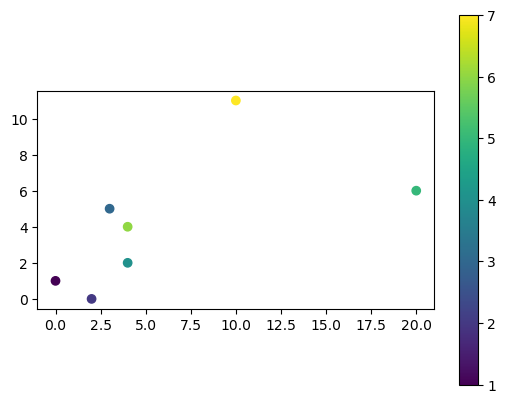

In [58]:
ax = gdf.plot(column = 'data1', legend = True)

### Importing Shape files
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

GeoPandas can easily load vector data from `.shp` files, as well as `.csv`, `.json`, and other common geospatial vector file formats. Let's start with a `.shp` that contains the boundaries of every country on the planet.

In [60]:
import os

# file & path
fn = os.path.join('./data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
gdf = gpd.read_file(fn)
gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


Like a `Pandas DataFrame`, this `GeoPandas DataFrame` looks quite similar. You can see from that it contains a bunch of different columns for each country, but it also contains a `geometry` column that `GeoPandas` reads in as a `shapely` object. 

But functionally, `gdf` has many of the same methods and attributes as a `Pandas DataFrame`. Let's take a look at some of the similarities and differences. 

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [44]:
print(type(gdf))
gdf.columns

<class 'geopandas.geodataframe.GeoDataFrame'>


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

<div class="example">
    ✏️ <b> Try it. </b> 
   Try ordering the countries by population estimate.
</div>

In [48]:
# fill in the question marks with the correct column
gdf.sort_values(by = '???', ascending = False)

<div class="example">
    ✏️ <b> Try it. </b> 
   Try showing only the country name and population for the top ten most populated countries.
</div>

In [55]:
# fill in the question marks with the correct column
gdf.sort_values(by = 'POP_EST', ascending = False)[['???', '???']].head(10)

✏️ Try making a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) of log10 GDP estimate by country.

In [72]:
gdf.GDP_MD_EST.max()

21140000.0

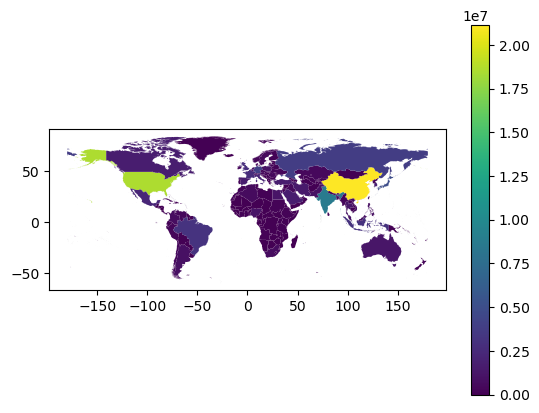

In [74]:
# fill in the question marks with the correct column
ax = gdf.plot(column = '???', legend = True)

### Concatenating and Merging Data
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Often you will have tabular data, like a `.csv` file, that does not contain Geographic information. But it may have catagorical staptial information. In this case, you may have to [concatenate](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) or [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), two datasets to connect the `.csv` file to spatial boundaries contained in a `.shp` file. Both concatenate and merge are quite useful. But with tabular data, you will most likely need to join two (or more) datasets based on a common set of values. 

For example, you may have a dataset with a columns called `country` but it does not have a geographic boundaries for the countries. You will then have to merge that dataset with a second dataset that has the geographic boundaries. This is often the case with `.csv` file that you want to attach to a `.shp` file to make a map.

To merge two datasets, both datasets must have a column with the same name and (hopefully) the same values on which to join the the datasets. Let's look at our `.csv` file from last week.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [81]:
fn = os.path.join('./data/DhsPrevalenceWCovar.csv')
df = pd.read_csv(fn)
df.head()

,country,year,countryCode,continent,stunt_rural,stunt_urban,waste_rural,waste_urban,stunt_all,waste_all,...,foodExport,foodImport,gdpPPP,gdpPPPpercap,giniIndex,urbanPop,urbanPopGrowth,clusterPrecipAnom,nationalTempAnom,nationalPrecipAnom
0,Albania,2008,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,4.333982,16.432549,2.921436e+10,9912.196804,30.0,49.991,1.435124,86.245678,102.151715,102.020721
1,Albania,2009,ALB,Europe,0.240576,0.244390,0.092801,0.124743,0.242117,0.105710,...,5.669017,17.087390,3.019429e+10,10313.952000,NaN,51.076,1.473288,132.170168,100.470106,134.103392
2,Armenia,2000,ARM,Asia,0.238902,0.178222,0.019989,0.034612,0.207806,0.027483,...,13.493826,24.967986,1.242650e+10,3921.857522,NaN,64.666,-1.610375,NaN,102.973351,74.551193
3,Armenia,2005,ARM,Asia,0.190440,0.214489,0.033354,0.081562,0.204712,0.061964,...,13.361364,17.662960,2.212058e+10,7259.203892,36.0,63.938,-0.761535,NaN,100.503031,114.152255
4,Armenia,2010,ARM,Asia,0.253302,0.197388,0.053731,0.036160,0.221035,0.043591,...,16.176402,17.667463,2.671931e+10,9068.787651,30.0,63.440,-0.766717,134.773428,114.066048,121.256156


**Cool!** Our dataset from last week has a column - `country` - that has catagorical geographic information that we can likely use to concatenate our geometry data from our world countries `.shp` file. But we first need to look at what columns we will need from world countries `.shp` file, which are the name and the geometry.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [82]:
gdf.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

Let's make a new `GeoDataFrame` just with the columns we need and then let's merge.
<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [85]:
gdf_sub = gdf[['NAME','geometry']]
gdf_sub

,NAME,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...
249,Macao,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
250,Ashmore and Cartier Is.,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
251,Bajo Nuevo Bank,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
252,Serranilla Bank,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


Before we can merge the two datasets, we have to make sure they both have the same column name. In this case, we need to rename `NAME` to country.
<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [93]:
# Rename the column
gdf = gdf_sub.rename({'NAME' : 'country'}, inplace = True) # inplace = True will overwrite the dataframe's columns name

/var/folders/1q/4fd5w5_d5m3_l087yl0p7kt46wjsmq/T/ipykernel_27526/2521561512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf = gdf_sub.rename({'NAME' : 'country'}, inplace = True) # inplace = True will overwrite the dataframe's columns name


In [94]:
gdf_sub

,NAME,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...
249,Macao,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ..."
250,Ashmore and Cartier Is.,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
251,Bajo Nuevo Bank,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
252,Serranilla Bank,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


In [91]:
# Now merge them
df_m = pd.merge(df, gdf_sub, on = 'country', how = 'inner')

KeyError: 'country'

- CRS
- RASTERS
- Look at rasters 